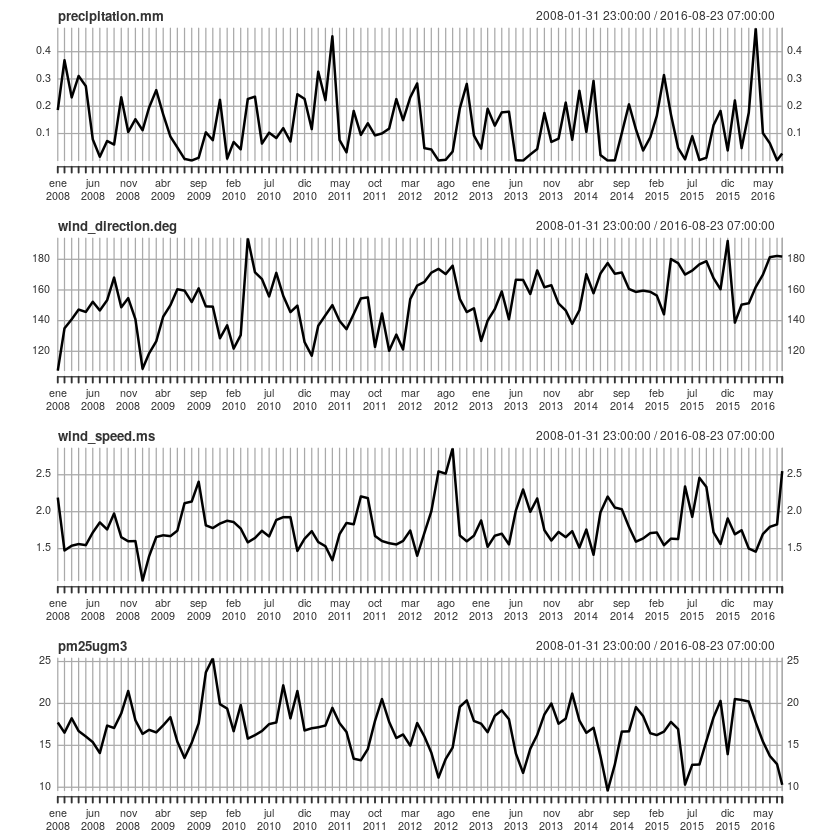

In [40]:
# Representación de series de tiempo
# Descargar datos de: 
# https://drive.google.com/open?id=0B-dmEvN59Z2ZZFdXZnBEYThDZTg
# setwd() a la carpeta con los archivos
# install.packages("xts")
# install.packages("zoo") # solo si es necesario 
library(xts)

datos <- read.csv("BELISARIO_nmv.csv")

par(mfrow=c(4,1)) # Paneles en 4 filas 1 columna
for (i in 2:ncol(datos)) {
    
    # Lee cada variable y transforma el string fecha en un tipo de dato fecha hora (POSIXct)
    dat.xts <- xts(datos[,i], as.POSIXct(datos$Date_time, format="%d/%m/%Y %H:%M:%S"))
    
    # calcula puntos con intervalos de 1 mes a partir de los datos de fecha y hora
    ep <- endpoints(dat.xts,'months') 
    
    # calcula las medias para los periodos especificados (meses)
    md <- period.apply(dat.xts,ep,mean)
    
    # imprime el gráfico usando en main el nombre de la variable (columna)
    print(plot(md, main=colnames(datos)[i]))
}

# Cambiar el parámetro de endpoints por day, weeks, months, quarters, years 

In [42]:
# Ver: http://www.cookbook-r.com/Graphs/Multiple_graphs_on_one_page_(ggplot2)/
# Permite multiples ggplot2 gráficos
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

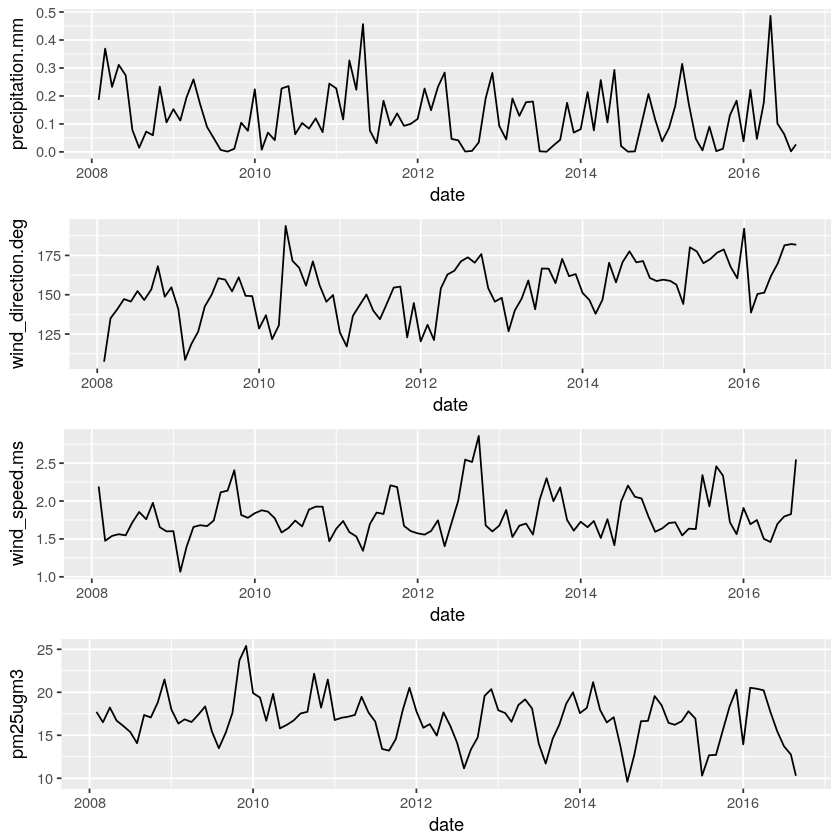

In [43]:
library(xts)
library(ggplot2)

datos <- read.csv("BELISARIO_nmv.csv")

p<-list()

for (i in 2:ncol(datos)) {
    
    # Lee cada variable y transforma el string fecha en un tipo de dato fecha hora (POSIXct)
    dat.xts <- xts(datos[,i], as.POSIXct(datos$Date_time, format="%d/%m/%Y %H:%M:%S"))
    
    # calcula puntos con intervalos de 1 mes a partir de los datos de fecha y hora
    ep <- endpoints(dat.xts,'months') 
    
    # calcula las medias para los periodos especificados (meses)
    md <- period.apply(dat.xts,ep,mean) 

    serie_df <- data.frame(date=index(md), value=coredata(md))
    
    # imprime el gráfico usando en main el nombre de la variable (columna)
    p[[i-1]] <- ggplot(serie_df, aes(x=date, y=value)) + geom_line() + ylab(colnames(datos)[i])

}

multiplot(plotlist=p)

In [ ]:
# Gráficos interactivos con plotly
library(plotly)
library(xts)

datos <- read.csv("BELISARIO_nmv.csv")

for (i in 2:ncol(datos)) {
    
    # Lee cada variable y transforma el string fecha en un tipo de dato fecha hora (POSIXct)
    dat.xts <- xts(datos[,i], as.POSIXct(datos$Date_time, format="%d/%m/%Y %H:%M:%S"))
    
    # calcula puntos con intervalos de 1 mes a partir de los datos de fecha y hora
    ep <- endpoints(dat.xts,'months') 
    
    # calcula las medias para los periodos especificados (meses)
    md <- period.apply(dat.xts,ep,mean) 

    serie_df <- data.frame(date=index(md), value=coredata(md))
    
    # imprime el gráfico usando en main el nombre de la variable (columna)
    yl <- list(title = colnames(datos)[i])
    p <- plot_ly(serie_df, x= ~date, y= ~value, mode='lines', type="scatter") %>% layout(yaxis = yl)
    print(p)
}

# Descargar resultados
# https://drive.google.com/open?id=0B-dmEvN59Z2ZN0huMXVhWVgtYWc

In [ ]:
# Gráficos interactivos con plotly
# Heatmap a partir de los missing values

data <- read.csv("BELISARIO.csv")
dmv <- is.na(data)
dmv <- 1 - dmv
dmv <- dmv[,2:5]
dmv <- t(dmv)
plot_ly(z = dmv, type = "heatmap", y=c("Prec","WD","WS","PM2.5"), 
        x=as.POSIXct(data$Date_time, format="%d/%m/%Y %H:%M:%S"))

# Descargar resultados
# https://drive.google.com/open?id=0B-dmEvN59Z2ZN0huMXVhWVgtYWc